### Imports:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as stats
import seaborn as sns
from typing import Dict, Tuple
import warnings

%matplotlib inline

In [2]:
warnings.filterwarnings('ignore')

# Analysis

In [3]:
first_actual_row = 59 # all previous rows are some irrelevant metadata

df = pd.read_csv('AMI_GSE66360_series_matrix.csv', encoding='ISO-8859-1', header= None)
a = df.drop(df.index[:first_actual_row]).reset_index(drop=True)
a.dropna(how='any', axis=0)

df = a.T # make patients as rows and [Class, IDs, and genes] as columns, for better readability
column_names = df.iloc[0] # get column names
df = df[1:] # don't include headers row in data
df.columns = column_names

In [4]:
def convert_to_numeric(c):
    try:
        return pd.to_numeric(c)
    except:
        return c
    
df = df.apply(convert_to_numeric)

In [5]:
df.dtypes

0
Class               object
ID_REF              object
1007_s_at          float64
1053_at            float64
117_at             float64
                    ...   
AFFX-ThrX-5_at     float64
AFFX-ThrX-M_at     float64
AFFX-TrpnX-3_at    float64
AFFX-TrpnX-5_at    float64
AFFX-TrpnX-M_at    float64
Length: 54677, dtype: object

In [6]:
df

,Class,ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
1,H,GSM1620819,5.866378,8.225790,6.179732,6.179478,2.792048,9.290411,6.998285,5.348944,...,13.257325,13.266235,14.571230,14.276568,4.504659,3.139334,2.747015,2.651554,3.413429,3.140612
2,H,GSM1620820,4.948736,7.525865,6.628137,6.582889,2.695714,9.462275,6.558215,5.410884,...,13.593860,13.517013,14.738834,14.341233,4.409226,3.039961,2.638606,2.643615,3.399063,3.132691
3,H,GSM1620821,5.148384,7.764637,5.859151,6.602135,2.580181,9.116776,6.851623,5.254073,...,13.372759,13.416583,14.627181,14.318568,4.310076,3.220109,2.495261,2.626028,3.539970,3.698396
4,H,GSM1620822,5.064419,7.198461,5.974135,6.545905,2.712124,9.134584,7.357827,5.242140,...,13.490226,13.494827,14.754124,14.363296,4.439311,3.263782,2.544199,2.504958,3.396225,3.638612
5,H,GSM1620823,5.017833,7.831450,6.793079,5.911542,2.723687,9.582344,7.283873,5.219484,...,13.236785,13.330192,14.548389,14.263677,4.562883,3.138524,2.506630,2.609707,3.434720,3.577649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,M,GSM1620913,6.472517,8.261422,6.367759,6.440978,3.730139,7.355730,6.206879,6.217930,...,6.601746,5.942308,7.290514,8.988511,5.567947,5.558780,5.429437,4.487940,4.254286,5.375811
96,M,GSM1620914,5.678816,6.925753,6.835756,6.955883,2.914868,7.944295,6.638364,5.992344,...,14.271037,14.163706,14.884506,14.792506,4.902195,3.416999,2.834741,2.782356,3.882080,3.744138
97,M,GSM1620915,5.653286,7.918424,7.577035,6.499215,3.013901,8.563123,7.379568,5.766029,...,13.898616,13.682425,14.884506,14.783801,5.239906,3.699181,3.249683,3.056727,3.649827,4.021536
98,M,GSM1620916,6.013841,7.442701,7.147417,6.587065,2.729320,8.699222,6.598350,5.577456,...,13.847006,13.551593,14.858066,14.778166,4.556134,3.485280,2.711413,2.833818,3.523410,3.812564


### a) High level description of the data and some pre-processing

1. There are 54675 genes profiles - each represented by a column (and as rows originally, before our pre-processing)
2. There are 99 samples (subjects/patients) in total - each represented by a row  (and as columns originally, before our pre-processing)

In [1]:
H, M = df['Class'].value_counts()
print(f'3. There are {H} H samples in the H class, and {M} M samples.')
print(f'\t(H – Healthy, M - Myocardial Infraction)')

NameError: name 'df' is not defined

##### 4. If there are missing values, then remove the entire row (gene) from the data matrix

In [8]:
df.dropna(axis='columns', inplace=True) # Removing columns with missing values
df

,Class,ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
1,H,GSM1620819,5.866378,8.225790,6.179732,6.179478,2.792048,9.290411,6.998285,5.348944,...,13.257325,13.266235,14.571230,14.276568,4.504659,3.139334,2.747015,2.651554,3.413429,3.140612
2,H,GSM1620820,4.948736,7.525865,6.628137,6.582889,2.695714,9.462275,6.558215,5.410884,...,13.593860,13.517013,14.738834,14.341233,4.409226,3.039961,2.638606,2.643615,3.399063,3.132691
3,H,GSM1620821,5.148384,7.764637,5.859151,6.602135,2.580181,9.116776,6.851623,5.254073,...,13.372759,13.416583,14.627181,14.318568,4.310076,3.220109,2.495261,2.626028,3.539970,3.698396
4,H,GSM1620822,5.064419,7.198461,5.974135,6.545905,2.712124,9.134584,7.357827,5.242140,...,13.490226,13.494827,14.754124,14.363296,4.439311,3.263782,2.544199,2.504958,3.396225,3.638612
5,H,GSM1620823,5.017833,7.831450,6.793079,5.911542,2.723687,9.582344,7.283873,5.219484,...,13.236785,13.330192,14.548389,14.263677,4.562883,3.138524,2.506630,2.609707,3.434720,3.577649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,M,GSM1620913,6.472517,8.261422,6.367759,6.440978,3.730139,7.355730,6.206879,6.217930,...,6.601746,5.942308,7.290514,8.988511,5.567947,5.558780,5.429437,4.487940,4.254286,5.375811
96,M,GSM1620914,5.678816,6.925753,6.835756,6.955883,2.914868,7.944295,6.638364,5.992344,...,14.271037,14.163706,14.884506,14.792506,4.902195,3.416999,2.834741,2.782356,3.882080,3.744138
97,M,GSM1620915,5.653286,7.918424,7.577035,6.499215,3.013901,8.563123,7.379568,5.766029,...,13.898616,13.682425,14.884506,14.783801,5.239906,3.699181,3.249683,3.056727,3.649827,4.021536
98,M,GSM1620916,6.013841,7.442701,7.147417,6.587065,2.729320,8.699222,6.598350,5.577456,...,13.847006,13.551593,14.858066,14.778166,4.556134,3.485280,2.711413,2.833818,3.523410,3.812564


In [9]:
columns = df.shape[1]
print(f'After removing missing-values columns, our dataframe has {columns} columns')

After removing missing-values columns, our dataframe has 54630 columns


##### 5. Pick 20 genes at random. Draw histograms comparing expression levels of each of these genes in the two classes M and H

In [10]:
mask = df['Class'] == 'H'
df_H = df[mask]
df_M = df[~mask]

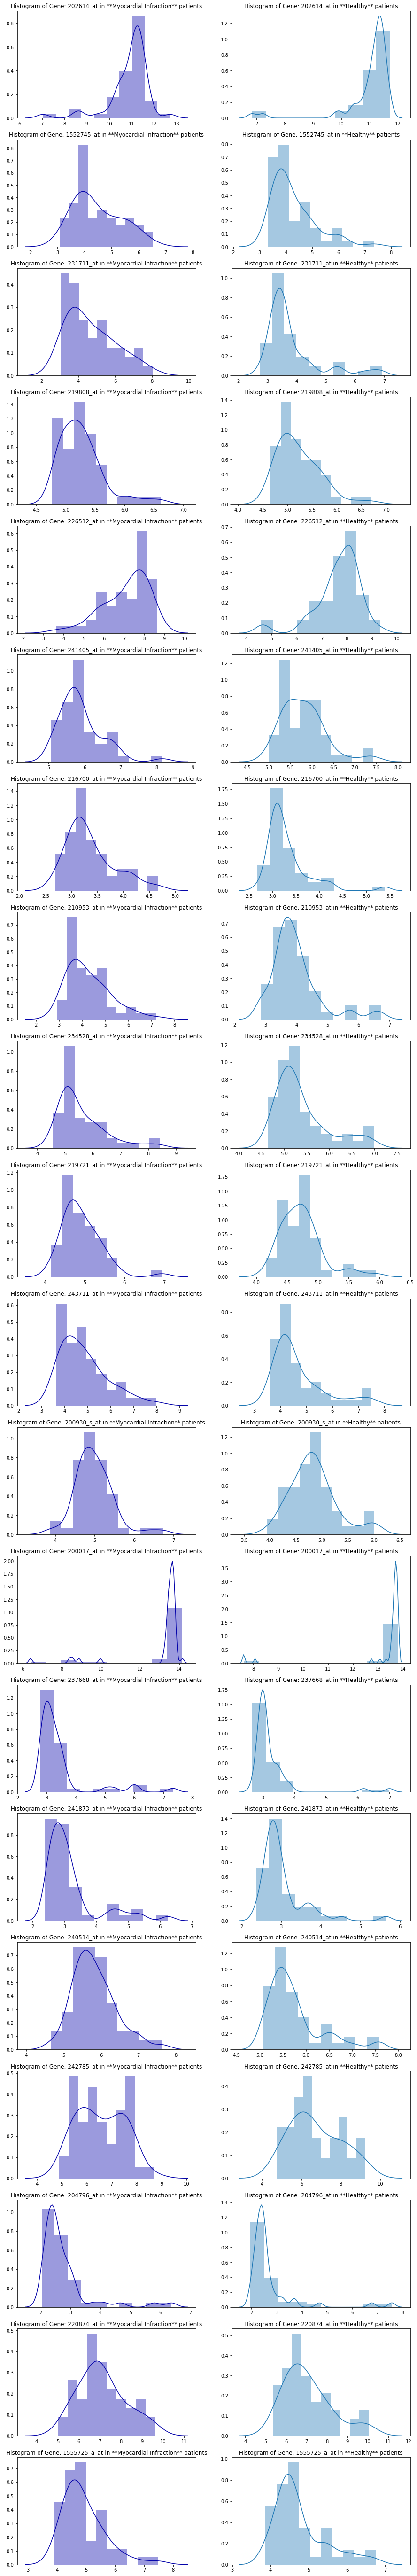

In [11]:
BINS = 10
N_genes = 20

# starting from index 2 which is the first gene (0 is "Class" and 1 is "ID")
random_indices = np.random.randint(low=2, high=df.shape[1], size=N_genes)

fig, ax = plt.subplots(N_genes, 2, figsize=(15, 5*N_genes))

for ax_ind, i in enumerate(random_indices):
    ax0 = sns.distplot(df_M.iloc[:, i], kde=True, bins=10, ax=ax[ax_ind, 0], label='M', color='#0504aa', axlabel=False)
    ax1 = sns.distplot(df_H.iloc[:, i], kde=True, bins=10, ax=ax[ax_ind, 1], label='H', axlabel=False)
    gene_name = df.columns[i]
    ax0.set_title(f'Histogram of Gene: {gene_name} in **Myocardial Infraction** patients')
    ax1.set_title(f'Histogram of Gene: {gene_name} in **Healthy** patients')

***
### b) WRS for differential expression (DE)

1. Consider some gene, g. Under the null model (which assumes that for g there is no M vs H DE), what is the expected sum of ranks of g’s expression levels measured for samples labeled M?

##### Answer:
$\mu_T = \frac{|M|(N+1)}{2} = \frac{49 \cdot (99+1)}{2} = 2450$

2. Denote this sum of ranks by RS(g). What is the maximal value, c, that RS(g) can take?

##### Answer:
Remember that there are 49 M samples.<br>
The maximal value is when all M patients have ranks 51 to 99:<br>
$c = max \big(RS(g) \big) = \frac{49(51+99)}{2} = 3675$

3. Under the null model, what is the probability of RS(g) = c? (provide a formula for this and explain it)

##### Answer:
P(A) = (# of ways A can happen) / (Total number of outcomes)<br>

Recall that $P(A) = \frac {n(A)}{\Omega}$ where $\Omega$ is the total number of outcomes (the probability sample space).<br>
P(A) = "What is the probability that a specific example is in A"

Under the null model we have the same probability to get rank c (maximal RS from before). 
In our case, we choose 49 patients out of 99 without repetitions and for those 49, we have 49! permutations to order their ranks such that the sum will equal c.<br>
Denominator: Total number of options, $\Omega = {N \choose |M|} |M|! = {99 \choose 49} 49!$<br>
Numerator: In order to sum up to the specific RS c, we have only a <u>single option</u> (of ranks) for it.<br>
For those ranks we have 49 permutations to distribute the samples among them (49! options to distribute 49 patients).<br>

So overall $$P\big(RS(g) = c\big) = \frac {|M|!}{{N \choose |M|} |M|!} = \frac {1}{{N \choose |M|}} = \frac {1}{{99 \choose 49}}$$

4. Under the null model, what is the probability of RS(g) = c-1? what is the probability of RS(g) = c-2? (provide formulas and explain them)

##### Answer:
$P\big(RS(g) = c-1 \big)$ is the same as the previous value.<br>
For c we need all M samples to spread on ranks 51-99<br>
So for c-1, the only option is to simply change the sample whose rank is 51 to have rank 50 (and thus decrement c by 1)<br>
$$P\big(RS(g) = c-1 \big) = P\big(RS(g) = c\big) = \frac {|M|!}{{N \choose |M|} |M|!} = \frac {1}{{N \choose |M|}} = \frac {1}{{99 \choose 49}}$$


For c-2 we need all M samples to spread on ranks 49,52-99 <b>OR</b> 50,51,53-99 --- both decrementing c by 2 overall.<br>
The denominator is similar by definition of $\Omega$. The numerator is now $2\cdot 49!$ because there are 2 distributions of samples such that the sum of their ranks equal c-2
$$P\big(RS(g) = c-2 \big) = \frac {2 \cdot |M|!}{{N \choose |M|} |M|!} = \frac {2}{{N \choose |M|}} = \frac {2}{{99 \choose 49}}$$

<!--  not sure this is true
And in general $\forall 1 \leq x \leq c$:
$$P\big(RS(g) = c-x \big) = \frac {x \cdot |M|!}{{N \choose |M|} |M|!} = \frac {x}{{N \choose |M|}} = \frac {x}{{99 \choose 49}}$$ -->

5. Draw a histogram of the values of RS(g) in the dataset. Here g ranges over all genes in the data (after the clean-up). Compute the IQR for this distribtuion.

##### Answer:

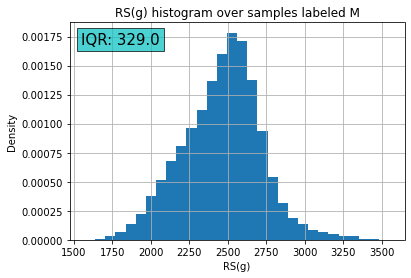

In [12]:
H_samples = df['Class'] == 'H'
M_samples = df['Class'] == 'M'

def calculate_RS(g):
    ranks = g.rank() # get ranks of all samples for this gene g
    return ranks[M_samples].sum() # sum of the ranks of ONLY the 'M' samples for this gene g

ranked_df = df.iloc[:,2:].apply(calculate_RS, axis=0) # apply the function on every gene
ranked_df.hist(bins=30, density=True)

q75, q25 = np.percentile(ranked_df, [75 ,25])
iqr = q75 - q25 # stats.iqr(ranked_df)

plt.title('RS(g) histogram over samples labeled M')
plt.ylabel('Density')
plt.xlabel('RS(g)')

max_y = plt.gca().get_ylim()[1]
min_x = plt.gca().get_xlim()[0]
plt.text(min_x*1.05, max_y*0.9, f'IQR: {iqr}' ,color='black',size=15, bbox=dict(facecolor='c', alpha=0.7))
plt.show()

***
### c) Differential Expression
The purpose is to determine the statistical significance of differential expression (DE) observed for each gene in H vs M.<br>
Evaluate the DE in both one-sided directions for every gene, using both Student t-test and WRS test.<br>
Report the number of genes overexpressed in M vs H at a p-value better (≤) than 0.07, and genes underexpressed in M vs H at a p-value of better than 0.07<br>
For both directions use both a Student ttest and a WRS test.

##### Answer:

In [13]:
alpha = 0.07 # certainty of 93%

##### TTEST:

In [14]:
def calculate_ttest(g):
    '''Calculate the T-test for the means of two independent samples of scores'''
    # this is the one Zohar mentioned in class
    return stats.ttest_ind(g[M_samples], g[H_samples], equal_var=True)


# starting from index 2 which is the first gene (0 is "Class" and 1 is "ID")
TTEST_df = df.iloc[:,2:].apply(calculate_ttest, axis=0, result_type='expand')
TTEST_df.index=['statistic', 'p-value']

TTEST_df

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
statistic,-1.278585,0.447602,4.041393,0.102599,0.481005,-1.25881,-2.885473,2.406316,-2.154836,-4.055713,...,-0.616825,-0.838321,-0.598171,-0.755246,2.221230,1.108412,0.961627,1.051736,0.617371,1.471453
p-value,0.204094,0.655439,0.000106,0.918493,0.631596,0.21112,0.004817,0.018008,0.033650,0.000101,...,0.538795,0.403911,0.551120,0.451931,0.028661,0.270425,0.338628,0.295534,0.538437,0.144406


In [15]:
TTEST_values = TTEST_df.T['statistic'] # The calculated t-statistic
TTEST_p_values = TTEST_df.T['p-value'] / 2  # Since "ttest_ind()" returns the 2-tailed p-value of the test, we divide the values by 2 ("...a two-sided test for the null hypothesis")

TTEST_overexpressed_genes_df = TTEST_df.T[(TTEST_values > 0) & (TTEST_p_values < alpha)]
TTEST_underexpressed_genes_df = TTEST_df.T[(TTEST_values <= 0) & (TTEST_p_values < alpha)]

print(f'TTEST overexpressed genes in M vs H is {TTEST_overexpressed_genes_df.shape[0]}') # shape[0] for the number of rows left after filtering
print(f'TTEST underexpressed genes in M vs H is {TTEST_underexpressed_genes_df.shape[0]}')

TTEST overexpressed genes in M vs H is 8517
TTEST underexpressed genes in M vs H is 8639


##### WRS:

In [16]:
def calculate_WRS(g):
    return stats.ranksums(g[M_samples], g[H_samples])


# starting from index 2 which is the first gene (0 is "Class" and 1 is "ID")
WRS_df = df.iloc[:,2:].apply(calculate_WRS, axis=0, result_type='expand')
WRS_df.index=['statistic', 'p-value']

WRS_df

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
statistic,-1.021787,1.077775,4.290106,0.629869,1.035784,-1.679650,-3.079359,1.686649,-2.918392,-3.681233,...,0.0,-0.153968,0.640367,0.804832,2.365507,2.281525,2.204541,1.574672,1.469694,1.672652
p-value,0.306882,0.281134,0.000018,0.528780,0.300303,0.093025,0.002074,0.091671,0.003518,0.000232,...,1.0,0.877635,0.521934,0.420916,0.018005,0.022517,0.027486,0.115332,0.141645,0.094396


In [17]:
WRS_df_copy = WRS_df.copy()

WRS_values = WRS_df_copy.T['statistic'] # The test statistic under the large-sample approximation that the rank sum statistic is normally distributed
WRS_p_values = WRS_df_copy.T['p-value'] / 2  # Since "ranksums()" returns the 2-sided p-value of the test, we divide the values by 2

WRS_overexpressed_genes_df = WRS_df_copy.T[(WRS_values > 0) & (WRS_p_values < alpha)]
WRS_underexpressed_genes_df = WRS_df_copy.T[(WRS_values <= 0) & (WRS_p_values < alpha)]

print(f'WRS overexpressed genes in M vs H is {WRS_overexpressed_genes_df.shape[0]}') # shape[0] for the number of rows left after filtering
print(f'WRS underexpressed genes in M vs H is {WRS_underexpressed_genes_df.shape[0]}')

WRS overexpressed genes in M vs H is 10787
WRS underexpressed genes in M vs H is 10667


***
### d) Correlations

In [18]:
# Select the 80 most significant genes from each one of the one-sided WRS DE lists you computed in section c
n = 80
over_significant_df = WRS_overexpressed_genes_df.sort_values(by='p-value').head(n) # sorting by the p-values
under_significant_df = WRS_underexpressed_genes_df.sort_values(by='p-value').head(n)

# Generate a set of 160 genes, D, which is the union of the above two sets
D = over_significant_df.append(under_significant_df)
D_df = df[D.index]

In [19]:
def gen_kendall_pairs(df):

    corrs: Dict[Tuple[str, str], 
                Tuple[np.float64, np.float64]] = dict()

    for gene1 in df.columns:
        for gene2 in df.columns:

            if gene1 == gene2:
                # avoiding correlations of a gene with itself
                continue

            key = (gene1, gene2)
            key_opposite = (gene2, gene1)

            if key not in corrs and key_opposite not in corrs: # avoiding duplicates since tau(g1, g2) == tau(g2, g1)
                kndl = stats.kendalltau(df[gene1], df[gene2])
                corrs[key] = (kndl[0], kndl[1]) # tau, p-value
    
    return corrs

corrs = gen_kendall_pairs(D_df)

1. Compute Kendall 𝜏 correlations in all pairs within D (160 choose 2 numbers). Represent the correlation matrix as a 160x160 heatmap

In [20]:
D_kendall_correlations_df = D_df.corr(method='kendall') # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

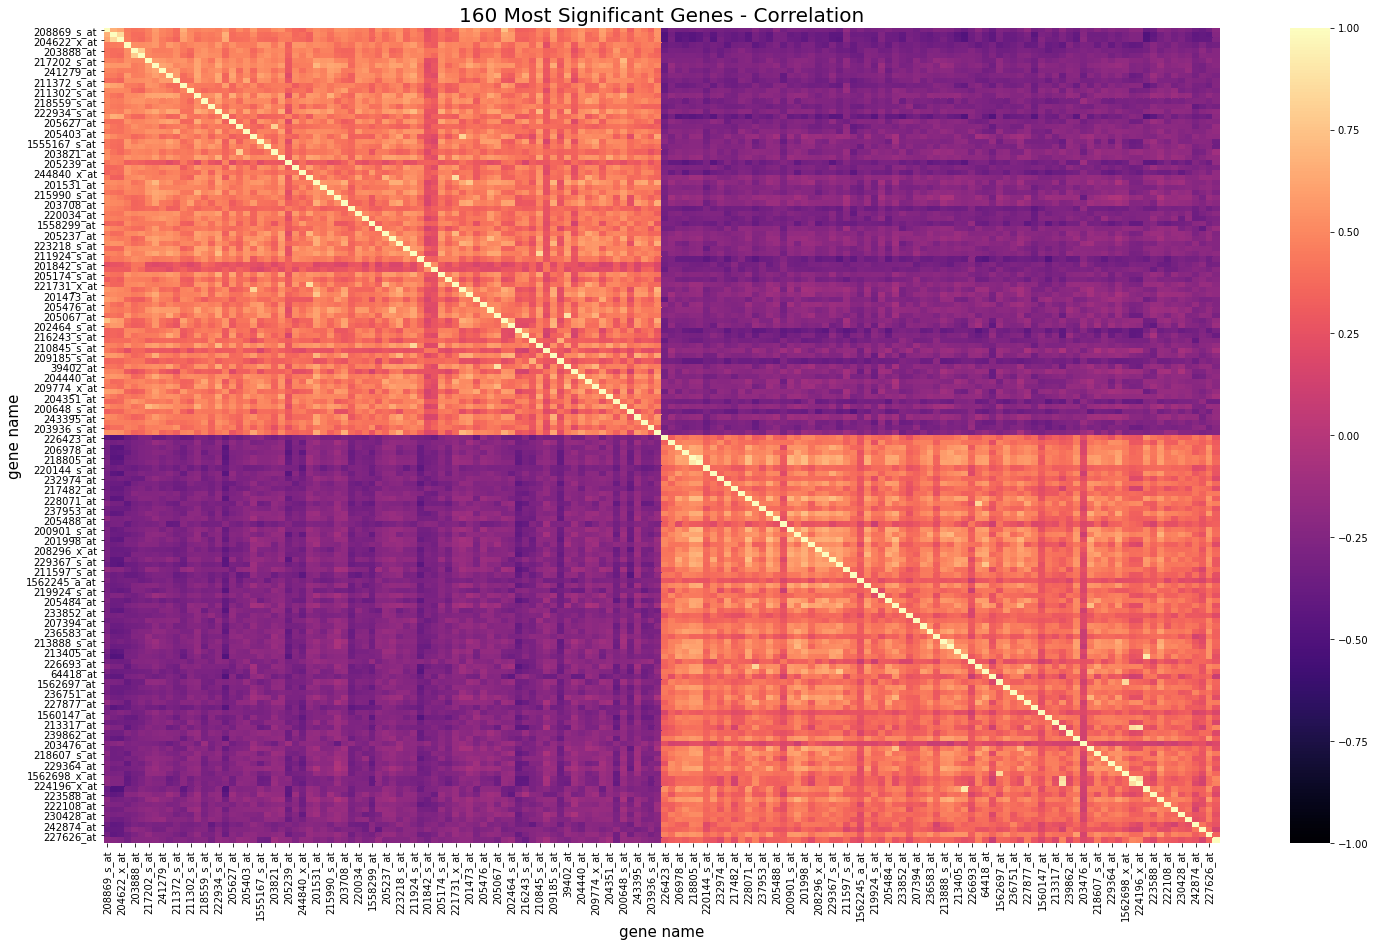

In [21]:
plt.figure(figsize = (25,15))
sns.heatmap(D_kendall_correlations_df, cmap= 'magma', vmin=-1, vmax=1)

plt.title(f'{n*2} Most Significant Genes - Correlation', fontsize=20)
plt.xlabel('gene name', fontsize=15)
plt.ylabel('gene name', fontsize=15)
plt.show()

2. Under a NULL model that assumes that genes are pairwise independent, what is the expected value for 𝜏? 
What is the observed mean of the numbers you calculated in the above section?

##### Answer:
Under a NULL model that assumes that genes are pairwise independent, the expected value for 𝜏 would be 0 --> For each pair of genes, their ranks will be randomly mixed and thus, on average, we expect that the number of concordant pairs will eqaul the number of discordant pairs.<br>

In [22]:
kendall_mean = np.mean(D_kendall_correlations_df.mean())

print(f'The observed mean of the numbers we calculated in the above section is {kendall_mean}')

The observed mean of the numbers we calculated in the above section is 0.09016181231892703


3. What can you report about co-expression of genes in D (coexpression is inferred from the correlation of the expression levels of genes, across a set of samples)? Do we observe any significant co-expression? Explain your answer

##### Answer:

In order to answer thoroughly, we'll also look at the histogram of the correlations:

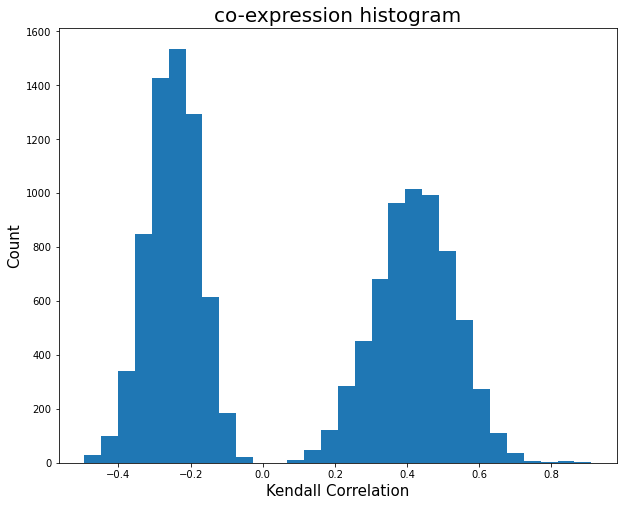

In [23]:
plt.figure(figsize = (10, 8))
plt.hist(np.array([v[0] for k, v in corrs.items()]), bins=30)
plt.title('co-expression histogram', fontsize=20)
plt.xlabel('Kendall Correlation', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

From the heatmap we can see that there is a strong positive co-expression among the overexpressed genes and also among the underexpressed genes. In the histogram these are probably in the right gaussian. <br>

For overexpressed VS underexpressed - we can see negative correlation. In the histogram these are in the left gaussian.

That makes sense. For instance, within overexpressed genes - we expect a relatively high amount of concordant pairs, since, when you look at a pair of (M, H) - you expect that M's expression levels will be higher than H's - so they will be concordant in terms of kendall. <br>

We don't know if we should expect a similar relationship within pairs of (M, M) and (H, H). <br>
We're lacking the domain knowledge in this case. <br>
Maybe for 2 sick patients there are different levels of sickness? <br>
so maybe if patient1 is "more sick" than patient2 we expect that: <br>
$$ gene_x(patient1) > gene_x(patient2) \rightarrow gene_y(patient1) > gene_y(patient2)$$ <br> 
And maybe this is not related to sickness at all. Maybe for some biological reason it makes sense for a set of genes. <br>

From our limited knowledge we tend to think that for (M, H) pairs we expect concordancy, and for (H, H) and (M, M) we expect less concordancy. <br>
Actually, if that's the case - we indeed expect a positive correlation of ~0.5. <br>

With a similar train of thought - the other results make sense (negative correlation between overepressed and underexpressed).

#### Note - we consider co-expressed pairs only those with positive correlation

In [24]:
min_corr = 0.5 # a threshold that says "the correlation is a *strong* co-expression correlation if it's >= 0.5"

co_expressed = np.array([v[0] for k, v in corrs.items() if v[0] > 0])
co_expressed_pairs = len(co_expressed)
significant_co_expression = np.sum(co_expressed >= min_corr)
print(f"We got {co_expressed_pairs} co-expressed pairs and {significant_co_expression} *strong* co-expressed pairs")

We got 6320 co-expressed pairs and 1521 *strong* co-expressed pairs


4. How many co-expressed pairs do we observe in FDR=0.05?

In [25]:
def compute_fdr(pvals, fdr_th=0.05):

    N = len(pvals) 

    report = None
    for i, pval in enumerate(np.sort(pvals)):
        gene_pairs = i + 1 # since i starts from 0

        fdr = (pval * N) / gene_pairs

        if report is None:
            report = gene_pairs

        if fdr <= fdr_th and gene_pairs > report:
            report = gene_pairs

    print(f"We can report {report:,} in FDR({fdr_th})")
    
# taking p vals of only the positive correlared pairs
coexpressed_pvals = np.array([v[1] for k, v in corrs.items() if v[0] > 0])
compute_fdr(coexpressed_pvals)

We can report 6,291 in FDR(0.05)


5. What would have been advantages and disadvantages of computing co-expression for all genes in the study rather than only for genes in D? 

##### Answer:

We believe the key point to answer this is to understand that it is possible to get a high correlation for 2 genes that are not especially over/under expressed. <br>
However, doing this preprocessing of narrowing down to only the most over & under expressed genes - actually helps us to reach closer to a relationship of causation. This way we ensure higher chances that a biological truth will stand behind the correlation. <br>

So, the advantage of computing over all genes is the adventage of a brute-force approach - this way we can reveal all correlations, 
and potentially find interesting, strongly correlated pairs that are not necessairily in our over & under expressed samples, for 2 reasons - either they're not especially over/under expressed - as we stated above, or because they're not in the top 80 of each group. Maybe in the top 100 for example.

For the disadvantages:
    - Complexity - the number of pairs is in order of magnitude of |genes|^2 which is ~54000^2 =~ 3 Billion pairs
    - False Positives - as we explained above - the differential expression helps us to place a ground of biological truth behind the correlations. For all pairs - with such high numbers we can get many high correlations, just by chance.

6. Perform the above steps on the same set D, but restrict attention only to samples labeled M. What do you see now? Can you explain this?

## Restricting attention to M labeled samples

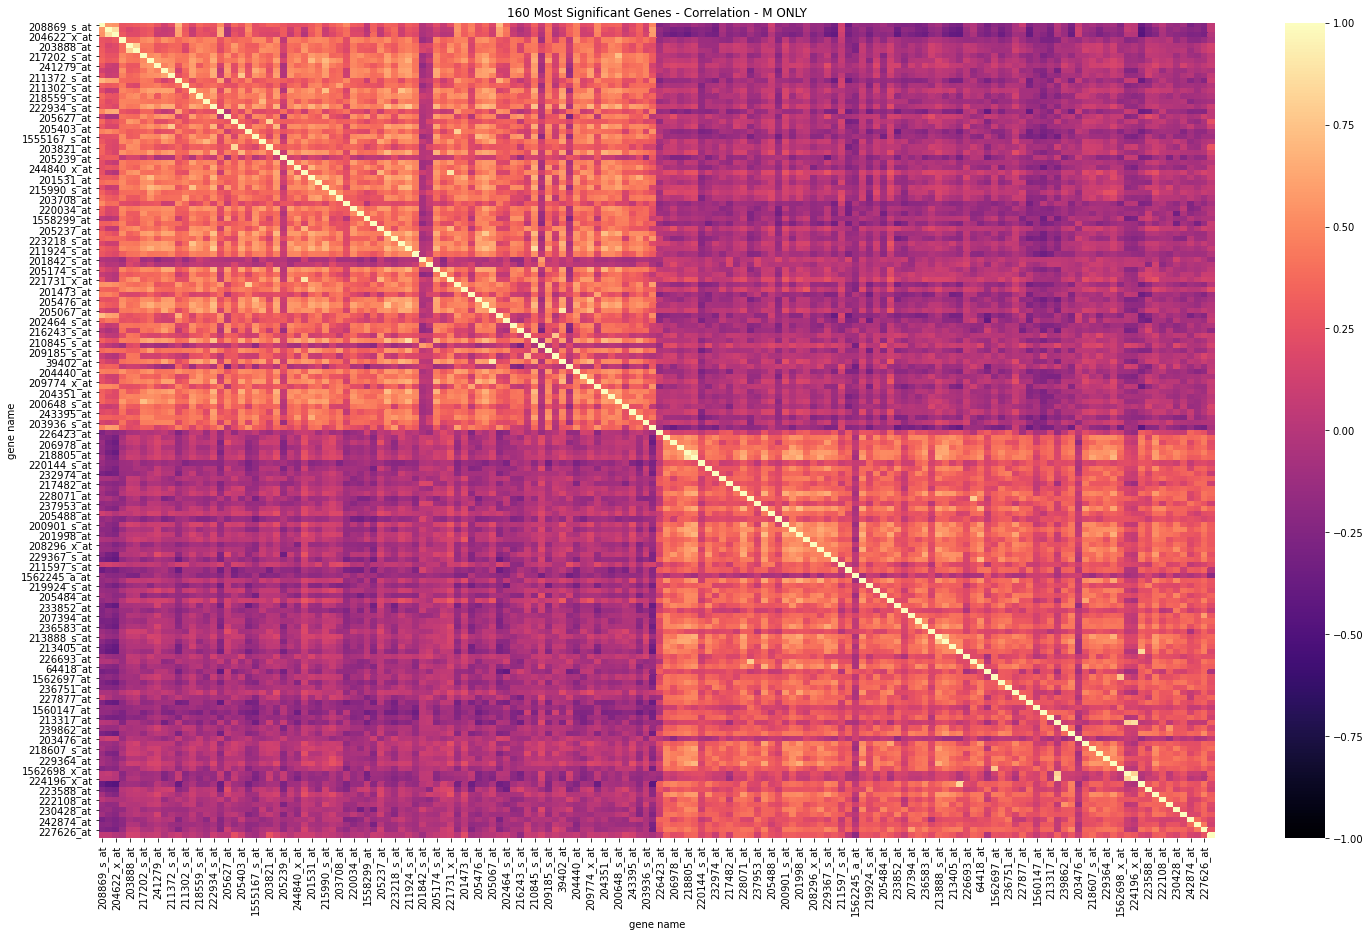

In [26]:
M_df = D_df[M_samples] # 49X160
M_kendall_correlations_df = M_df.corr(method='kendall')

plt.figure(figsize = (25,15))
sns.heatmap(M_kendall_correlations_df, cmap= 'magma', vmin=-1, vmax=1)

plt.title(f'{n*2} Most Significant Genes - Correlation - M ONLY')
plt.xlabel('gene name')
plt.ylabel('gene name')
plt.show()

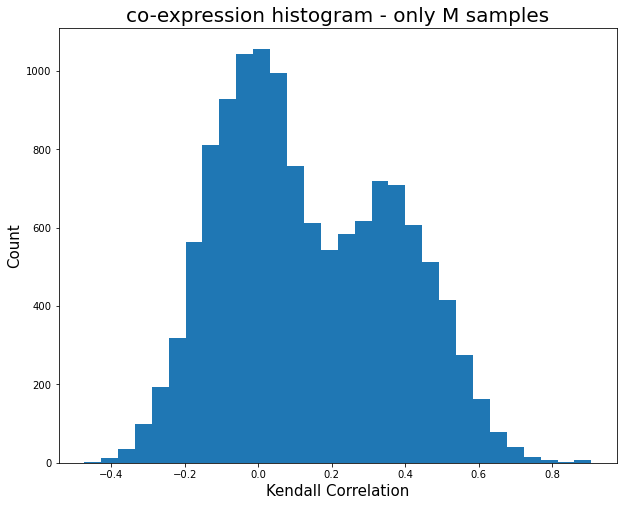

In [27]:
M_corrs = gen_kendall_pairs(M_df)

plt.figure(figsize = (10, 8))
plt.hist(np.array([v[0] for k, v in M_corrs.items()]), bins=30)
plt.title('co-expression histogram - only M samples', fontsize=20)
plt.xlabel('Kendall Correlation', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

As exptected and explained in previous sections - by restricting to only the samples from class M, we see less (amount of) significant positive/negative correlations between over/under-expressed genes.<br>

As mentioned, for (M, H) pairs we definitely expect concordancy. <br>
For pairs of (M, M) or (H, H) - we expect less concordancy. Hence, what we see makes sense. <br>

Although, we might still expect it to not behave as the null model. <br>
We gave the "less sick, more sick" hypothesis in section d3 that might explain it. <br>

The histogram indeed doesn't look like a null model of kendall correlations would look like. <br>
Let's plot an overabundance graph to better visualize the diff between the null model and the actual distribution.

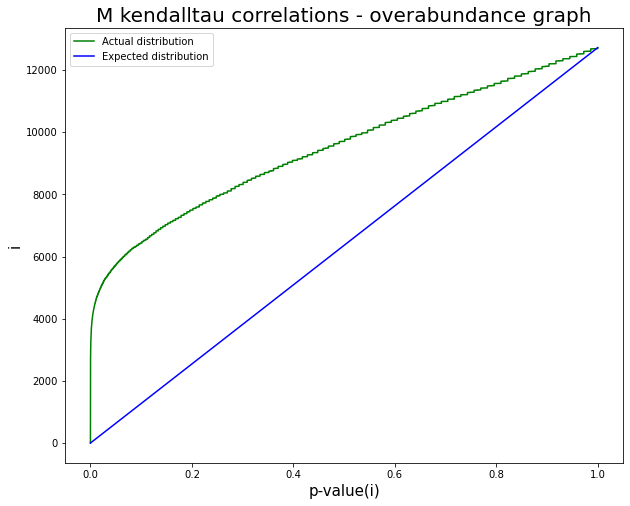

In [28]:
def overabundance_graph(pvals, title):
    plt.figure(figsize = (10, 8))
    pvals = pvals.copy()
    x_actual = np.sort(pvals)
    N = x_actual.shape[0]
    x_expected = np.linspace(0, 1.0, N)
    y = np.arange(N)
    plt.title(f"{title} - overabundance graph", fontsize=20)
    plt.xlabel("p-value(i)", fontsize=15)
    plt.ylabel("i", fontsize=15)
    plt.plot(x_actual, y, color='g', label='Actual distribution')
    plt.plot(x_expected, y, color='b', label='Expected distribution')
    plt.legend()
    
overabundance_graph(pvals=np.array([v[1] for k, v in M_corrs.items()]), 
                    title='M kendalltau correlations')

We can clearly see that even when restricting only to M samples - the actual distribution of the correlations is still pretty far from the expected (null) distribution

In [29]:
# Performing the FDR step only for the M samples

# extracting only the p-values of the positive correlated pairs (of M)
M_pvals = np.array([v[1] for k, v in M_corrs.items() if v[0] > 0])
compute_fdr(M_pvals)

We can report 4,750 in FDR(0.05)


***
### e) Plots and Conclusions of the DE and correlation analysis

1.1. Construct the DE overabundance plots (blue and green lines as shown in class) for M vs H overexpression (higher expression levels in M) using WRS and t-test using the results you had computed in Section 3c
##### Answer:

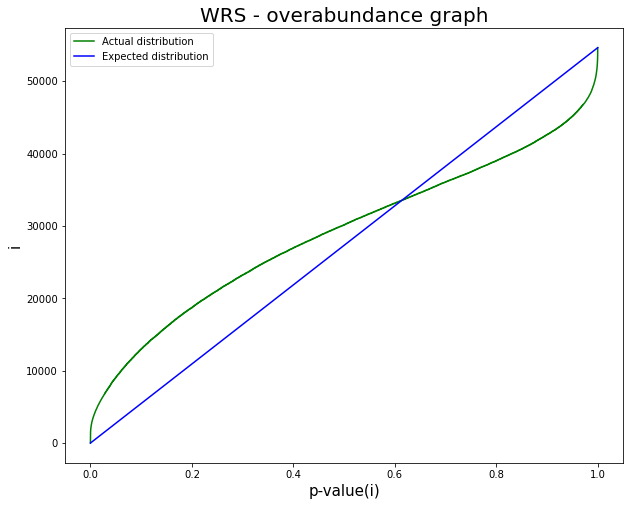

In [37]:
WRS_df_copy = WRS_df.copy()

# correct to one-sided pval
WRS_df_copy.loc['p-value'] = WRS_df_copy.loc['p-value'] / 2

# adjust to the wanted side of the statistic
opposite_side_mask = WRS_df_copy.loc['statistic'] < 0
WRS_df_copy.loc['p-value'][opposite_side_mask] = 1 - WRS_df_copy.loc['p-value'][opposite_side_mask]

overabundance_graph(pvals=WRS_df_copy.loc['p-value'], title='WRS')

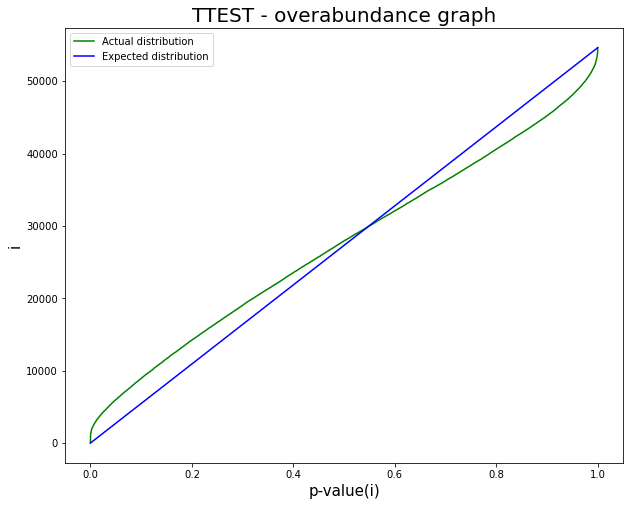

In [36]:
TTEST_df_copy = TTEST_df.copy()

# correct to one-sided pval
TTEST_df.loc['p-value'] = TTEST_df.loc['p-value'] / 2

# adjust to the wanted side of the statistic
opposite_side_mask = TTEST_df_copy.loc['statistic'] < 0
TTEST_df_copy.loc['p-value'][opposite_side_mask] = 1 - TTEST_df_copy.loc['p-value'][opposite_side_mask]

overabundance_graph(pvals=TTEST_df_copy.loc['p-value'], title='TTEST')

1.2. State, for each comparison, the number of genes, k, at which we observe:<br>
a) FDR = 0.05<br>
b) FDR = 0.01<br>
c) FDR = 0.005<br>
If these events are not observed at any k, then make that statement.

##### Answer:

In [38]:
for pvals, desc in [(TTEST_df_copy.loc['p-value'], 'TTEST'), (WRS_df_copy.loc['p-value'], 'WRS')]:
    print('---------')
    print(desc)
    print('---------')
    for fdr in [0.05, 0.01, 0.005]:
        compute_fdr(pvals, fdr_th=fdr)

---------
TTEST
---------
We can report 1,689 in FDR(0.05)
We can report 1,112 in FDR(0.01)
We can report 961 in FDR(0.005)
---------
WRS
---------
We can report 2,808 in FDR(0.05)
We can report 1,601 in FDR(0.01)
We can report 1,323 in FDR(0.005)


2. Select any 3 differentially expressed genes, from D (which was defined in 3d), and produce a graphical representation of their expression patterns that demonstrates the observed DE

##### Answer:

In [33]:
D_new = D.sample(n=3)
D_new = df[D_new.index]
D_new.head()

,206978_at,205237_at,229367_s_at
1,11.162685,7.054609,9.632159
2,10.607600,8.098221,9.419998
3,9.918341,5.095699,7.883436
4,11.599957,4.929486,11.639559
5,10.057829,5.968274,9.343290


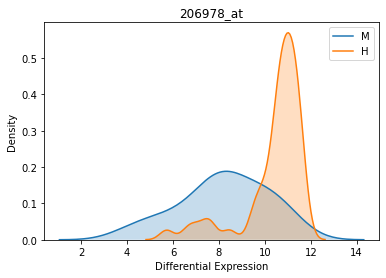

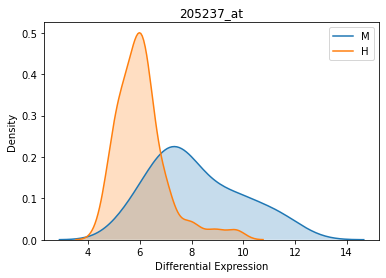

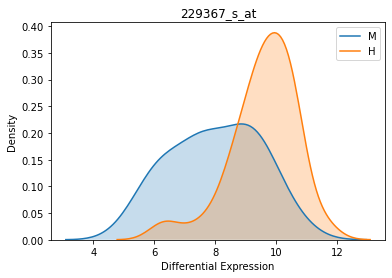

0
206978_at      None
205237_at      None
229367_s_at    None
dtype: object

In [34]:
def plot_expression_patterns(g):
    '''Plot differential expression (DE) values observed for each gene in H vs M'''
    sns.kdeplot(g[M_samples], shade=True, label='M')
    sns.kdeplot(g[H_samples], shade=True, label='H')
    plt.title(g.name)
    plt.xlabel('Differential Expression')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

D_new.apply(plot_expression_patterns, axis=0)

3. Draw a heatmap representation of the expression values of the genes in D (from 3d), across the entire cohort (all samples). Order the genes and the samples to produce the maximal visual effect

##### Answer:

Text(68.09375, 0.5, 'Genes')

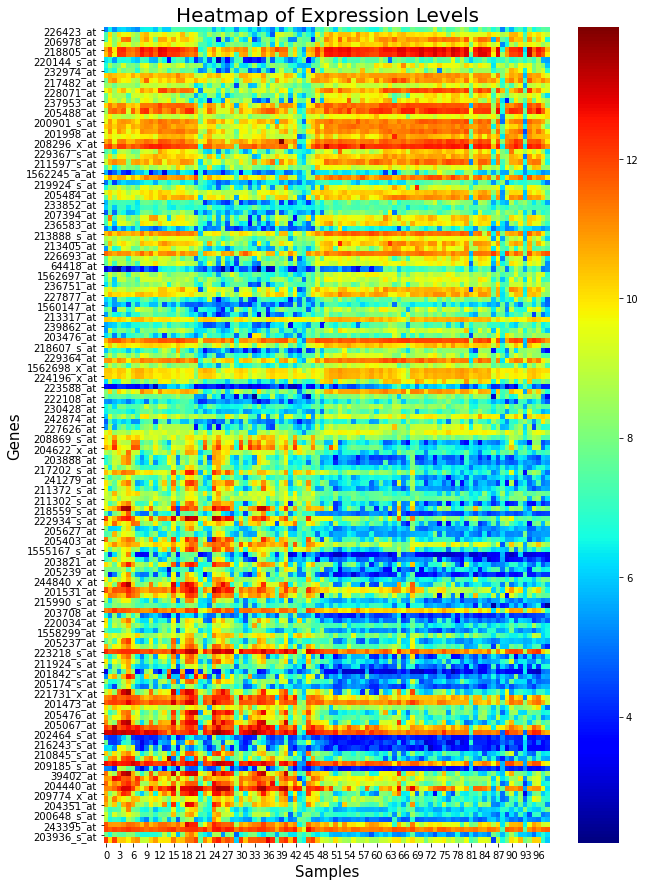

In [35]:
over = df[over_significant_df.index]
under = df[under_significant_df.index]

H_over = over.T[df[df['Class'] == 'H'].index]
H_under = under.T[df[df['Class'] == 'H'].index]

M_over = over.T[df[df['Class'] == 'M'].index]
M_under = under.T[df[df['Class'] == 'M'].index]

upper_genes = pd.concat([M_under, H_under], axis=1, ignore_index=True)
lower_genes = pd.concat([M_over, H_over], axis=1, ignore_index=True)
all_genes = pd.concat([upper_genes, lower_genes])

plt.figure(figsize = (10, 15))
sns.heatmap(all_genes, cmap=plt.cm.jet)
plt.title('Heatmap of Expression Levels', fontsize=20)
plt.xlabel('Samples', fontsize=15)
plt.ylabel('Genes', fontsize=15)